In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics  import accuracy_score

In [48]:
df = pd.read_table('/content/Restaurant_Reviews.csv')

In [49]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [50]:
df.isnull().count

<bound method DataFrame.count of      Review  Liked
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
..      ...    ...
995   False  False
996   False  False
997   False  False
998   False  False
999   False  False

[1000 rows x 2 columns]>

In [51]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [52]:
df['Liked'] = df['Liked'].map({1:'Positive',0:'Negative'})

In [53]:
df

,Review,Liked
0,Wow... Loved this place.,Positive
1,Crust is not good.,Negative
2,Not tasty and the texture was just nasty.,Negative
3,Stopped by during the late May bank holiday of...,Positive
4,The selection on the menu was great and so wer...,Positive
...,...,...
995,I think food should have flavor and texture an...,Negative
996,Appetite instantly gone.,Negative
997,Overall I was not impressed and would not go b...,Negative
998,"The whole experience was underwhelming, and I ...",Negative


In [54]:
x = df['Review'].values
y= df['Liked'].values

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

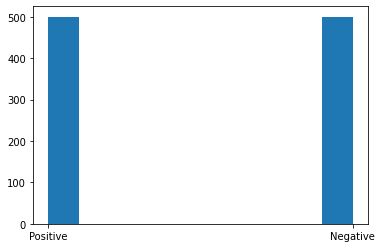

In [134]:
plt.hist(y)

In [66]:
vect= CountVectorizer(stop_words='English')

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [68]:
x_train.shape

(750,)

In [69]:
x_train.shape

(750,)

In [70]:
y_train.shape

(750,)

In [71]:
x_test.shape

(250,)

In [72]:
y_test.shape

(250,)

In [124]:
vect = CountVectorizer(stop_words='english')
x_train_vect =vect.fit_transform(x_train)
x_test_vect =vect.transform(x_test)
#y_train_vect =vect.transform(y_train)
#y_test_vect =vect.transform(y_test)

In [125]:
model = SVC()
model.fit(x_train_vect,y_train)
y_pred = model.predict(x_test_vect)

In [126]:
y_pred

array(['Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negati

In [100]:
y_pred.shape

(250,)

In [103]:
accuracy_score(y_test,y_pred)

0.756

In [120]:
review=np.array(['How bad it was not a good place','Hell bad','QUite good place to visit','excellent i loved it'])
review.ndim

1

In [127]:
review_vect = vect.transform(review)


In [128]:
review_result = model.predict(review_vect)

In [129]:
review_result

array(['Positive', 'Negative', 'Positive', 'Positive'], dtype=object)

In [177]:
y_pred_df= pd.DataFrame(y_pred)
y_test_df=pd.DataFrame(y_test)

In [178]:
y_pred_df = y_pred_df[0].map({'Positive':2,'Negative':-1})
y_test_df =y_test_df[0].map({'Positive':1,'Negative':0})

In [179]:
y_pred_df 

0      2
1     -1
2     -1
3     -1
4      2
      ..
245    2
246    2
247    2
248   -1
249    2
Name: 0, Length: 250, dtype: int64

In [180]:
y_test_df

0      1
1      0
2      1
3      1
4      1
      ..
245    1
246    1
247    1
248    1
249    1
Name: 0, Length: 250, dtype: int64

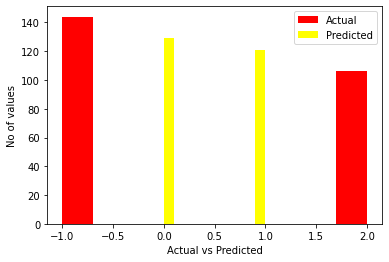

In [190]:
plt.hist(y_pred_df,color='red')
plt.hist(y_test_df,color='yellow')
plt.xlabel('Actual vs Predicted')
plt.ylabel('No of values')
plt.legend(['Actual','Predicted'])
plt.plot()
plt.show()

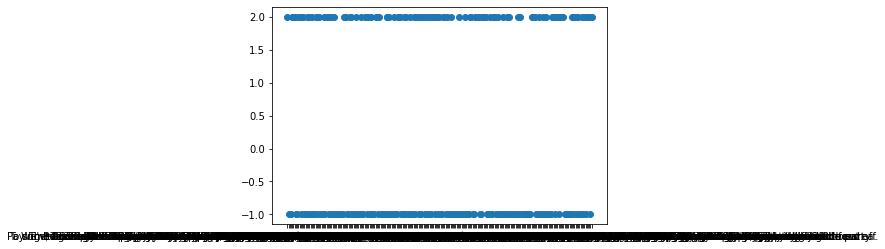

In [195]:
plt.scatter(x_test,y_pred_df[0:])

In [196]:
from sklearn.pipeline import make_pipeline as mkp
model2=mkp(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred_2 = model2.predict(x_test)
y_pred_2

array(['Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positi

In [197]:
accuracy_score(y_pred_2,y_test)

0.756

In [202]:
import joblib 
joblib.dump(model2,'sentiment_anlyzer')

['sentiment_anlyzer']

In [203]:
model_test = joblib.load('sentiment_anlyzer')
model_test

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [204]:
y_test_1 = model_test.predict(['worst restaurant ever'
,'best place to visit'
,'such wonderful experience'
,'no better place to visit'
,'nightmare for me just disgusting'])

In [205]:
y_test_1 

array(['Negative', 'Positive', 'Positive', 'Negative', 'Negative'],
      dtype=object)